# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [320]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [321]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\Blood_Diseases_Cohort'

In [322]:
df_alb = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_raw.csv', index_col=0)

In [323]:
df_alb.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours   age sex   race  ICU    LOS_hours  zip_code  \
0       D62                 1  87.0   M  White    0    52.366667         1   
1       D64                 0  31.0   F  White    0    76.400000         3   
2       D62                 1  85.0   M  White    1   184.466667         7   
3       D64                 0  84.0   M    NaN    0   307.633333         1   
4       D64                 1  64.0   M  Other    0  1630.083333         9   

  bed_size  CCI  bl_albumin_value  last_albumin_value  \
0  500-999    4               NaN                 NaN   
1   >=1000    0               NaN                 NaN   
2  500-999    2               4.0                 3.6   
3   >=1000    6               1.6                 1.2   
4  300-499    8               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  qSOFA  \
0                            NaN                      NaN      0   
1                            NaN                      NaN      2   
2                            0.0                      NaN      1   
3                            1.0                      0.0      0   
4                            NaN                      NaN      0   

   hospital_free_days  beta_blocker  Cirrhosis_score  nutritional_anemia  \
0                87.0             1                0                   0   
1                10.0             0                0                   0   
2                25.0             0                0                   0   
3                77.0             1                0                   0   
4                22.0             1                0                   0   

   MELD  SEWS  
0  11.0     0  
1   NaN     2  
2  10.0     3  
3   8.0     0  
4   8.0     1

In [324]:
df_alb.shape

(386135, 23)

In [325]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 302356
Number of unique encounters: 386135


In [326]:
df_alb.isnull().sum()

personid                              0
encounterid                           0
condition                             0
albumin_24_hours                      0
age                                  15
sex                                 959
race                              17819
ICU                                   0
LOS_hours                            35
zip_code                              0
bed_size                              0
CCI                                   0
bl_albumin_value                 154608
last_albumin_value               205592
albumin_lab_baseline_severity    154608
normal_albumin_achieved          267457
qSOFA                                 0
hospital_free_days                   33
beta_blocker                          0
Cirrhosis_score                       0
nutritional_anemia                    0
MELD                             162814
SEWS                                  0
dtype: int64

## Load Non Albumin Data

In [327]:
df_no_alb = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/non_alb_blood_diseases_raw.csv', index_col=0)

In [328]:
df_no_alb.head()

personid                           encounterid  \
0  00007988-a30f-4726-a022-7fd4bc8e673d  6bf7015d-0c68-4d56-baed-cf56af0291a8   
1  0000e060-d28c-47da-b974-a5298f9bde93  8ae3f0f6-129b-40b5-b279-4d787de94a27   
2  000351c0-4ac4-41fe-a973-ae947ab697f9  81f6a7a3-3deb-432f-902e-f5cd8cfe917e   
3  000445fe-4132-456d-8fde-12adff4e77b4  130efa4d-a1aa-42a6-9013-966d673bfe4a   
4  00095caf-9b73-45c0-89cb-a5d900de3cb5  5f801b79-01c4-4d88-885b-ea410e684a1f   

  condition   age sex   race  ICU   LOS_hours  zip_code bed_size  CCI  \
0       D64  50.0   F  Other    0    9.449167         9   >=1000    1   
1       D62  32.0   F  Other    0  354.183333         1   >=1000    0   
2       D63  56.0   M  White    1   14.666667         7   >=1000    6   
3       D64  79.0   M  Other    0    9.230000         1  500-999    6   
4       D50  85.0   F  White    0  136.700000         8   >=1000    3   

   bl_albumin_value  last_albumin_value  albumin_lab_baseline_severity  \
0               NaN                 NaN                            NaN   
1               NaN                 NaN                            NaN   
2               2.7                 2.5                            1.0   
3               NaN                 NaN                            NaN   
4               3.0                 2.6                            0.0   

   normal_albumin_achieved  qSOFA  hospital_free_days  beta_blocker  \
0                      NaN      0                49.0             0   
1                      NaN      0                74.0             0   
2                      0.0      0                87.0             0   
3                      NaN      0                53.0             0   
4                      NaN      0                72.0             0   

   Cirrhosis_score  nutritional_anemia  MELD  SEWS  
0                0                   0   NaN     0  
1                0                   0   NaN     0  
2                0                   0   NaN     0  
3                0                   0  10.0     0  
4                0                   1   NaN     0

In [329]:
df_no_alb.shape

(5918811, 22)

In [330]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 2733304
Number of unique encounters: 5918811


In [331]:
df_no_alb.isnull().sum()

personid                               0
encounterid                            0
condition                              0
age                                  219
sex                                11066
race                              292356
ICU                                    0
LOS_hours                          32165
zip_code                               0
bed_size                           37878
CCI                                    0
bl_albumin_value                 2702578
last_albumin_value               3972663
albumin_lab_baseline_severity    2702578
normal_albumin_achieved          5614177
qSOFA                                  0
hospital_free_days                 31671
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
MELD                             5607322
SEWS                                   0
dtype: int64

## Examine Difference In Vars

In [332]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'condition',
 'albumin_24_hours',
 'age',
 'sex',
 'race',
 'ICU',
 'LOS_hours',
 'zip_code',
 'bed_size',
 'CCI',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'qSOFA',
 'hospital_free_days',
 'beta_blocker',
 'Cirrhosis_score',
 'nutritional_anemia',
 'MELD',
 'SEWS']

In [333]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'condition',
 'age',
 'sex',
 'race',
 'ICU',
 'LOS_hours',
 'zip_code',
 'bed_size',
 'CCI',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'qSOFA',
 'hospital_free_days',
 'beta_blocker',
 'Cirrhosis_score',
 'nutritional_anemia',
 'MELD',
 'SEWS']

In [334]:
lst3 = [x for x in lst1 if x not in lst2]

In [335]:
lst3

['albumin_24_hours']

In [336]:
df_alb[['albumin_24_hours']].head(10)

albumin_24_hours
0                 1
1                 0
2                 1
3                 0
4                 1
5                 0
6                 1
7                 0
8                 0
9                 1

## Create binary "Albumin" variable for both datasets

In [337]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [338]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [339]:
### Also add 'albumin_24_hours' variable to non-albumin dataset with all 0s

df_no_alb = df_no_alb.assign(albumin_24_hours = 0)

In [340]:
df_alb.shape

(386135, 24)

In [341]:
df_no_alb.shape

(5918811, 24)

In [342]:
df_alb.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours   age sex   race  ICU    LOS_hours  zip_code  \
0       D62                 1  87.0   M  White    0    52.366667         1   
1       D64                 0  31.0   F  White    0    76.400000         3   
2       D62                 1  85.0   M  White    1   184.466667         7   
3       D64                 0  84.0   M    NaN    0   307.633333         1   
4       D64                 1  64.0   M  Other    0  1630.083333         9   

  bed_size  CCI  bl_albumin_value  last_albumin_value  \
0  500-999    4               NaN                 NaN   
1   >=1000    0               NaN                 NaN   
2  500-999    2               4.0                 3.6   
3   >=1000    6               1.6                 1.2   
4  300-499    8               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  qSOFA  \
0                            NaN                      NaN      0   
1                            NaN                      NaN      2   
2                            0.0                      NaN      1   
3                            1.0                      0.0      0   
4                            NaN                      NaN      0   

   hospital_free_days  beta_blocker  Cirrhosis_score  nutritional_anemia  \
0                87.0             1                0                   0   
1                10.0             0                0                   0   
2                25.0             0                0                   0   
3                77.0             1                0                   0   
4                22.0             1                0                   0   

   MELD  SEWS  albumin  
0  11.0     0        1  
1   NaN     2        1  
2  10.0     3        1  
3   8.0     0        1  
4   8.0     1        1

In [343]:
df_no_alb.head()

personid                           encounterid  \
0  00007988-a30f-4726-a022-7fd4bc8e673d  6bf7015d-0c68-4d56-baed-cf56af0291a8   
1  0000e060-d28c-47da-b974-a5298f9bde93  8ae3f0f6-129b-40b5-b279-4d787de94a27   
2  000351c0-4ac4-41fe-a973-ae947ab697f9  81f6a7a3-3deb-432f-902e-f5cd8cfe917e   
3  000445fe-4132-456d-8fde-12adff4e77b4  130efa4d-a1aa-42a6-9013-966d673bfe4a   
4  00095caf-9b73-45c0-89cb-a5d900de3cb5  5f801b79-01c4-4d88-885b-ea410e684a1f   

  condition   age sex   race  ICU   LOS_hours  zip_code bed_size  CCI  \
0       D64  50.0   F  Other    0    9.449167         9   >=1000    1   
1       D62  32.0   F  Other    0  354.183333         1   >=1000    0   
2       D63  56.0   M  White    1   14.666667         7   >=1000    6   
3       D64  79.0   M  Other    0    9.230000         1  500-999    6   
4       D50  85.0   F  White    0  136.700000         8   >=1000    3   

   bl_albumin_value  last_albumin_value  albumin_lab_baseline_severity  \
0               NaN                 NaN                            NaN   
1               NaN                 NaN                            NaN   
2               2.7                 2.5                            1.0   
3               NaN                 NaN                            NaN   
4               3.0                 2.6                            0.0   

   normal_albumin_achieved  qSOFA  hospital_free_days  beta_blocker  \
0                      NaN      0                49.0             0   
1                      NaN      0                74.0             0   
2                      0.0      0                87.0             0   
3                      NaN      0                53.0             0   
4                      NaN      0                72.0             0   

   Cirrhosis_score  nutritional_anemia  MELD  SEWS  albumin  albumin_24_hours  
0                0                   0   NaN     0        0                 0  
1                0                   0   NaN     0        0                 0  
2                0                   0   NaN     0        0                 0  
3                0                   0  10.0     0        0                 0  
4                0                   1   NaN     0        0                 0

In [344]:
print(df_no_alb.columns.to_list())

['personid', 'encounterid', 'condition', 'age', 'sex', 'race', 'ICU', 'LOS_hours', 'zip_code', 'bed_size', 'CCI', 'bl_albumin_value', 'last_albumin_value', 'albumin_lab_baseline_severity', 'normal_albumin_achieved', 'qSOFA', 'hospital_free_days', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'MELD', 'SEWS', 'albumin', 'albumin_24_hours']


In [345]:
df_no_alb = df_no_alb[['personid', 'encounterid', 'condition', 'albumin_24_hours', 'age', 'sex', 'race', 'ICU', 'LOS_hours', \
                       'zip_code', 'bed_size', 'CCI', 'bl_albumin_value', 'last_albumin_value', \
                       'albumin_lab_baseline_severity', 'normal_albumin_achieved', 'qSOFA', 'hospital_free_days', \
                       'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'MELD', 'SEWS', 'albumin']]

In [346]:
df_no_alb.head()

personid                           encounterid  \
0  00007988-a30f-4726-a022-7fd4bc8e673d  6bf7015d-0c68-4d56-baed-cf56af0291a8   
1  0000e060-d28c-47da-b974-a5298f9bde93  8ae3f0f6-129b-40b5-b279-4d787de94a27   
2  000351c0-4ac4-41fe-a973-ae947ab697f9  81f6a7a3-3deb-432f-902e-f5cd8cfe917e   
3  000445fe-4132-456d-8fde-12adff4e77b4  130efa4d-a1aa-42a6-9013-966d673bfe4a   
4  00095caf-9b73-45c0-89cb-a5d900de3cb5  5f801b79-01c4-4d88-885b-ea410e684a1f   

  condition  albumin_24_hours   age sex   race  ICU   LOS_hours  zip_code  \
0       D64                 0  50.0   F  Other    0    9.449167         9   
1       D62                 0  32.0   F  Other    0  354.183333         1   
2       D63                 0  56.0   M  White    1   14.666667         7   
3       D64                 0  79.0   M  Other    0    9.230000         1   
4       D50                 0  85.0   F  White    0  136.700000         8   

  bed_size  CCI  bl_albumin_value  last_albumin_value  \
0   >=1000    1               NaN                 NaN   
1   >=1000    0               NaN                 NaN   
2   >=1000    6               2.7                 2.5   
3  500-999    6               NaN                 NaN   
4   >=1000    3               3.0                 2.6   

   albumin_lab_baseline_severity  normal_albumin_achieved  qSOFA  \
0                            NaN                      NaN      0   
1                            NaN                      NaN      0   
2                            1.0                      0.0      0   
3                            NaN                      NaN      0   
4                            0.0                      NaN      0   

   hospital_free_days  beta_blocker  Cirrhosis_score  nutritional_anemia  \
0                49.0             0                0                   0   
1                74.0             0                0                   0   
2                87.0             0                0                   0   
3                53.0             0                0                   0   
4                72.0             0                0                   1   

   MELD  SEWS  albumin  
0   NaN     0        0  
1   NaN     0        0  
2   NaN     0        0  
3  10.0     0        0  
4   NaN     0        0

In [347]:
df_no_alb.albumin_24_hours.value_counts()

0    5918811
Name: albumin_24_hours, dtype: int64

## Combine Datasets

In [348]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [349]:
df.shape

(6304946, 24)

In [350]:
df.head(50)

personid  \
0   0007c498-2e93-4283-a3a7-1acdd95cfc00   
1   000c2d84-853e-480e-a287-4f7349ac831a   
2   005729af-49c9-420c-af85-4d226d9192c1   
3   00979be8-230b-47ac-8758-808cb2ec44a7   
4   00a47dc5-f54c-4ff3-a85a-efd40f6327b6   
5   00b6ec34-7816-4301-8317-3590b4a948d7   
6   00ef14c9-c421-4d20-ba99-a1b5836336e5   
7   010c48a7-25f8-4508-b0ac-628e7418e524   
8   01148376-f810-4744-ba64-2940362fd6c3   
9   015580cd-d37e-46f0-89db-827dd42fc0e4   
10  0212d914-ab07-43e4-bf24-9ce3ed4871d3   
11  021d12a6-ba01-4b9d-8d23-0861955cdab9   
12  025a8acf-b20c-44f9-b678-c5f84e9337cb   
13  028ebe0d-c977-43b6-a1e9-41fe56364979   
14  029bf264-b621-4da7-9d91-c20f6783104e   
15  02a01ac8-8eba-4adc-a64a-a42e527db6bf   
16  02d0d06b-f31b-4260-a4f1-c0642bd9b7e3   
17  02ef1ba5-3bf9-4382-bbfd-bc1c5539ef53   
18  0324aed3-8e00-4b8d-8bad-47e26a42371f   
19  033848f6-a6ff-4dac-8a65-df098464d98c   
20  034580dc-5c3b-4b09-a056-4e9f3ef03bef   
21  0346f30d-37d6-403a-9ccd-8d6e42667d15   
22  03587ad4-4c14-44f6-b829-315748b3a982   
23  0359bdcb-20ab-4702-b0ec-066e94f8d7e0   
24  036ee5db-239a-4b11-8597-5bcfd5749afd   
25  039e3a9b-e2cb-496a-9363-b3368b75490a   
26  03c19b13-77f7-4c7e-88ab-a719395282f5   
27  03e7a0e8-a327-4b9c-9a49-23f15cf94697   
28  03ed3519-5010-408b-8458-9e801788a33a   
29  040e6963-4946-429b-927d-f0b987d6f291   
30  042660c2-2d67-440f-8787-b6480c894cf7   
31  0427c939-3d09-440b-8b2a-58075199f582   
32  04283751-c26e-43e8-bf1c-8e019d15de87   
33  0434509e-6029-4807-9d70-35d4720fab82   
34  04705b03-50f8-4496-bd97-8959d5f47d6b   
35  0475a318-893c-468b-b007-c65b9b45b21f   
36  047e60fe-eca8-475c-ac4c-b8878caaaca7   
37  049a1158-5f53-4cc5-a53c-3e28332530fc   
38  04b6a7a1-388d-48cd-94e4-1d303c8bbaa9   
39  04ec0361-b0dd-4d18-bb5b-1a68ee93edea   
40  04f636e5-b6fc-471f-b95f-4f876126e777   
41  05065c03-ed9d-499d-8c2e-5041ee91518f   
42  0528f3b5-857a-49d0-b676-341d16b6caac   
43  054287dd-c0f6-46cd-9e96-92e4b7a2fc75   
44  054a0b0e-c258-41be-8d5b-c0d2299bbaaa   
45  05933906-3a8e-4a16-bd95-224a614e30fc   
46  05a28a49-420b-4583-b1a4-9deb2485bb0d   
47  05badf56-64d2-412a-bf18-46e6628f212d   
48  0613bf8d-583c-40a6-88ba-5068d14d1d29   
49  06145ed5-9e5a-4e20-ad45-3bc1aaef2ee3   

                             encounterid condition  albumin_24_hours   age  \
0   0c4ca544-af0e-478d-ba31-79f2dc0df17b       D62                 1  87.0   
1   240d9022-1a49-4227-9321-f721cda9a352       D64                 0  31.0   
2   72db8f8a-a7b4-4145-ae60-08f6340af882       D62                 1  85.0   
3   cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba       D64                 0  84.0   
4   e5804fa6-aacf-438a-94ce-baafd0aa2f4b       D64                 1  64.0   
5   387586e3-a77c-474d-bb69-d144a170fd05       D64                 0  69.0   
6   31cb9b95-0455-4444-bb29-4d611d2349f8       D72                 1  87.0   
7   ef3dddf7-6201-423b-8b72-4bc39da31b18       D84                 0  58.0   
8   f8b69aa7-e3e1-4d60-a1be-7c70a13cc128       D72                 0   0.0   
9   63a4914e-85e8-48ef-b1a5-780e04dc5f5f       D63                 1  57.0   
10  4b7e2217-0be9-4311-9617-cfe81963f66c       D63                 1  54.0   
11  3f75490c-832c-408d-b194-584203cad904       D61                 1  56.0   
12  85a8170d-5b72-42ff-891a-1a7d128df125       D69                 1  62.0   
13  e1f317f2-acc2-44f9-b936-e451975c8655       D69                 1  85.0   
14  a00743de-2ef9-4ba5-a1f4-f5ba4016c1c5       D64                 1  50.0   
15  a5b592cb-c9b3-47e5-bc6c-accd27c36ae3       D69                 1  61.0   
16  d9d4a108-3957-4768-b3ec-c999232388d9       D62                 0  67.0   
17  7479d40b-75a9-4351-9ae4-2e2b6daded7b       D69                 1  65.0   
18  5d8c1a49-d506-49ac-a6f7-1aa0a41bb823       D75                 1  58.0   
19  5e5983d6-a28e-462c-9264-b89385fc19e2       D53                 0  64.0   
20  9efa6d52-11c2-469e-ac95-965e44621a48       D61                 0  60.0   
21  3fbe2db7-8699-4a01-bbc1-2d86c27b8c6b       D63                 1  4

In [351]:
df.columns

Index(['personid', 'encounterid', 'condition', 'albumin_24_hours', 'age',
       'sex', 'race', 'ICU', 'LOS_hours', 'zip_code', 'bed_size', 'CCI',
       'bl_albumin_value', 'last_albumin_value',
       'albumin_lab_baseline_severity', 'normal_albumin_achieved', 'qSOFA',
       'hospital_free_days', 'beta_blocker', 'Cirrhosis_score',
       'nutritional_anemia', 'MELD', 'SEWS', 'albumin'],
      dtype='object')

## Look at variables, null values

In [352]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304946 entries, 0 to 5918810
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   personid                       object 
 1   encounterid                    object 
 2   condition                      object 
 3   albumin_24_hours               int64  
 4   age                            float64
 5   sex                            object 
 6   race                           object 
 7   ICU                            int64  
 8   LOS_hours                      float64
 9   zip_code                       int64  
 10  bed_size                       object 
 11  CCI                            int64  
 12  bl_albumin_value               float64
 13  last_albumin_value             float64
 14  albumin_lab_baseline_severity  float64
 15  normal_albumin_achieved        float64
 16  qSOFA                          int64  
 17  hospital_free_days             float64
 18  be

In [353]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                               0
encounterid                            0
condition                              0
albumin_24_hours                       0
age                                  234
sex                                12025
race                              310175
ICU                                    0
LOS_hours                          32200
zip_code                               0
bed_size                           37878
CCI                                    0
bl_albumin_value                 2857186
last_albumin_value               4178255
albumin_lab_baseline_severity    2857186
normal_albumin_achieved          5881634
qSOFA                                  0
hospital_free_days                 31704
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
MELD                             5770136
SEWS                                   0
albumin                                0
dtype: int64

## Fill or Drop Rows with Null Values, Other

In [354]:
df.drop(columns = ['last_albumin_value', 'normal_albumin_achieved', 'MELD'], inplace=True)

In [355]:
df.isnull().sum()

personid                               0
encounterid                            0
condition                              0
albumin_24_hours                       0
age                                  234
sex                                12025
race                              310175
ICU                                    0
LOS_hours                          32200
zip_code                               0
bed_size                           37878
CCI                                    0
bl_albumin_value                 2857186
albumin_lab_baseline_severity    2857186
qSOFA                                  0
hospital_free_days                 31704
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
SEWS                                   0
albumin                                0
dtype: int64

In [356]:
# drop the following variables, as previous analysis determined they were 
# either collinear with other variables, or not useful for predictions

# age, sex, bed_size, last_albumin_value, hemoglobin

df.drop(columns = ['age', 'sex', 'race', 'zip_code', 'bed_size'], inplace=True)

In [357]:
# change name of albumin_timing to albumin_24hrs var

# df.rename(columns = {'albumin_timing':'albumin_24hrs'}, inplace=True)

In [358]:
df.isnull().sum()

personid                               0
encounterid                            0
condition                              0
albumin_24_hours                       0
ICU                                    0
LOS_hours                          32200
CCI                                    0
bl_albumin_value                 2857186
albumin_lab_baseline_severity    2857186
qSOFA                                  0
hospital_free_days                 31704
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
SEWS                                   0
albumin                                0
dtype: int64

## Remove albumin_lab_baseline_severity variable

In [359]:
# df['albumin_lab_baseline_severity'].value_counts()

In [360]:
# it is all 1s provides no value

#df.drop(columns = ['albumin_lab_baseline_severity'], inplace=True)

In [361]:
df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours  ICU    LOS_hours  CCI  bl_albumin_value  \
0       D62                 1    0    52.366667    4               NaN   
1       D64                 0    0    76.400000    0               NaN   
2       D62                 1    1   184.466667    2               4.0   
3       D64                 0    0   307.633333    6               1.6   
4       D64                 1    0  1630.083333    8               NaN   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            NaN      0                87.0             1   
1                            NaN      2                10.0             0   
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
4                            NaN      0                22.0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
0                0                   0     0        1  
1                0                   0     2        1  
2                0                   0     3        1  
3                0                   0     0        1  
4                0                   0     1        1

In [362]:
# fill in all NA related to albumin variables with 0
# fill in total ICU LOS hours with 0

#df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)

In [363]:
df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours  ICU    LOS_hours  CCI  bl_albumin_value  \
0       D62                 1    0    52.366667    4               NaN   
1       D64                 0    0    76.400000    0               NaN   
2       D62                 1    1   184.466667    2               4.0   
3       D64                 0    0   307.633333    6               1.6   
4       D64                 1    0  1630.083333    8               NaN   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            NaN      0                87.0             1   
1                            NaN      2                10.0             0   
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
4                            NaN      0                22.0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
0                0                   0     0        1  
1                0                   0     2        1  
2                0                   0     3        1  
3                0                   0     0        1  
4                0                   0     1        1

In [364]:
df.isnull().sum()

personid                               0
encounterid                            0
condition                              0
albumin_24_hours                       0
ICU                                    0
LOS_hours                          32200
CCI                                    0
bl_albumin_value                 2857186
albumin_lab_baseline_severity    2857186
qSOFA                                  0
hospital_free_days                 31704
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
SEWS                                   0
albumin                                0
dtype: int64

In [365]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

# df.drop(columns = ['race'], inplace=True)

In [366]:
df.shape

(6304946, 16)

## Drop normal_albumin_achieved var

In [367]:
#df.drop(columns = ['normal_albumin_achieved'], inplace=True)

In [368]:
df.isnull().sum()

personid                               0
encounterid                            0
condition                              0
albumin_24_hours                       0
ICU                                    0
LOS_hours                          32200
CCI                                    0
bl_albumin_value                 2857186
albumin_lab_baseline_severity    2857186
qSOFA                                  0
hospital_free_days                 31704
beta_blocker                           0
Cirrhosis_score                        0
nutritional_anemia                     0
SEWS                                   0
albumin                                0
dtype: int64

In [369]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [370]:
df.isnull().sum()

personid                         0
encounterid                      0
condition                        0
albumin_24_hours                 0
ICU                              0
LOS_hours                        0
CCI                              0
bl_albumin_value                 0
albumin_lab_baseline_severity    0
qSOFA                            0
hospital_free_days               0
beta_blocker                     0
Cirrhosis_score                  0
nutritional_anemia               0
SEWS                             0
albumin                          0
dtype: int64

In [371]:
df.shape

(3430313, 16)

In [372]:
df['albumin'].value_counts()

0    3198799
1     231514
Name: albumin, dtype: int64

In [373]:
df['qSOFA'].describe()

count    3.430313e+06
mean     2.446372e-01
std      5.016092e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: qSOFA, dtype: float64

In [374]:
df['SEWS'].describe()

count    3.430313e+06
mean     7.000524e-01
std      1.291520e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.700000e+01
Name: SEWS, dtype: float64

## Drop patientid, encounterid, and condition variables

### Note: Condition can be added back later for clustering purposes

In [375]:
df.shape

(3430313, 16)

In [376]:
df['personid'].nunique()

1652570

In [377]:
df['encounterid'].nunique()

3404372

In [378]:
#these will not be useful for exploratory analyis / modeling

# edit: keep personid and encounterid for PSM

# df.drop(columns = ['condition'], inplace=True)

In [379]:
df.shape

(3430313, 16)

In [380]:
df.head()

personid                           encounterid  \
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
5  00b6ec34-7816-4301-8317-3590b4a948d7  387586e3-a77c-474d-bb69-d144a170fd05   
6  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
7  010c48a7-25f8-4508-b0ac-628e7418e524  ef3dddf7-6201-423b-8b72-4bc39da31b18   

  condition  albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
2       D62                 1    1  184.466667    2               4.0   
3       D64                 0    0  307.633333    6               1.6   
5       D64                 0    0  394.050000    1               1.6   
6       D72                 1    1  550.325000    1               2.6   
7       D84                 0    0  999.516667    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
5                            1.0      0                74.0             0   
6                            1.0      0                67.0             1   
7                            1.0      0                25.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
2                0                   0     3        1  
3                0                   0     0        1  
5                0                   0     0        1  
6                0                   0     1        1  
7                0                   0     0        1

In [381]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3430313 entries, 2 to 5918810
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   personid                       object 
 1   encounterid                    object 
 2   condition                      object 
 3   albumin_24_hours               int64  
 4   ICU                            int64  
 5   LOS_hours                      float64
 6   CCI                            int64  
 7   bl_albumin_value               float64
 8   albumin_lab_baseline_severity  float64
 9   qSOFA                          int64  
 10  hospital_free_days             float64
 11  beta_blocker                   int64  
 12  Cirrhosis_score                int64  
 13  nutritional_anemia             int64  
 14  SEWS                           int64  
 15  albumin                        int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 444.9+ MB


## Encode Variables as Necessary

In [382]:
# Binary Variables: sex (removed)

# Ordinal Variables: bed_size (removed), anemia_status

# Neither: race (removed)

In [383]:
df.columns.tolist()

['personid',
 'encounterid',
 'condition',
 'albumin_24_hours',
 'ICU',
 'LOS_hours',
 'CCI',
 'bl_albumin_value',
 'albumin_lab_baseline_severity',
 'qSOFA',
 'hospital_free_days',
 'beta_blocker',
 'Cirrhosis_score',
 'nutritional_anemia',
 'SEWS',
 'albumin']

In [384]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [385]:
# quick look at distributions

df.describe()

albumin_24_hours           ICU     LOS_hours           CCI  \
count      3.430313e+06  3.430313e+06  3.430313e+06  3.430313e+06   
mean       2.605651e-02  6.970180e-02  1.473134e+02  2.727216e+00   
std        1.593034e-01  2.546438e-01  6.094869e+02  2.589825e+00   
min        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000e+00  0.000000e+00  1.488861e+01  1.000000e+00   
50%        0.000000e+00  0.000000e+00  6.199972e+01  2.000000e+00   
75%        0.000000e+00  0.000000e+00  1.417667e+02  4.000000e+00   
max        1.000000e+00  1.000000e+00  5.165143e+04  2.300000e+01   

       bl_albumin_value  albumin_lab_baseline_severity         qSOFA  \
count      3.430313e+06                   3.430313e+06  3.430313e+06   
mean       3.521081e+00                   2.182807e-01  2.446372e-01   
std        7.582328e-01                   4.130790e-01  5.016092e-01   
min        7.000000e-05                   0.000000e+00  0.000000e+00   
25%        3.000000e+00                   0.000000e+00  0.000000e+00   
50%        3.600000e+00                   0.000000e+00  0.000000e+00   
75%        4.100000e+00                   0.000000e+00  0.000000e+00   
max        2.000000e+01                   1.000000e+00  3.000000e+00   

       hospital_free_days  beta_blocker  Cirrhosis_score  nutritional_anemia  \
count        3.430313e+06  3.430313e+06     3.430313e+06        3.430313e+06   
mean         4.325965e+01  1.928119e-01     1.015619e-01        2.392306e-01   
std          3.432187e+01  3.945066e-01     3.020713e-01        4.266139e-01   
min          0.000000e+00  0.000000e+00     0.000000e+00        0.000000e+00   
25%          9.000000e+00  0.000000e+00     0.000000e+00        0.000000e+00   
50%          3.700000e+01  0.000000e+00     0.000000e+00        0.000000e+00   
75%          8.300000e+01  0.000000e+00     0.000000e+00        0.000000e+00   
max          9.000000e+01  1.000000e+00     1.000000e+00        1.000000e+00   

               SEWS       albumin  
count  3.430313e+06  3.430313e+06  
mean   7.000524e-01  6.749063e-02  
std    1.291520e+00  2.508698e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    1.000000e+00  0.000000e+00  
max    1.700000e+01  1.000000e+00

In [386]:
df.isnull().sum()

personid                         0
encounterid                      0
condition                        0
albumin_24_hours                 0
ICU                              0
LOS_hours                        0
CCI                              0
bl_albumin_value                 0
albumin_lab_baseline_severity    0
qSOFA                            0
hospital_free_days               0
beta_blocker                     0
Cirrhosis_score                  0
nutritional_anemia               0
SEWS                             0
albumin                          0
dtype: int64

In [387]:
# df.drop(columns=['zip_code'], inplace=True)

## Remove outliers

In [388]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_hours']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [389]:
df.shape

(3413032, 16)

In [390]:
df.head()

personid                           encounterid  \
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
5  00b6ec34-7816-4301-8317-3590b4a948d7  387586e3-a77c-474d-bb69-d144a170fd05   
6  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
7  010c48a7-25f8-4508-b0ac-628e7418e524  ef3dddf7-6201-423b-8b72-4bc39da31b18   

  condition  albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
2       D62                 1    1  184.466667    2               4.0   
3       D64                 0    0  307.633333    6               1.6   
5       D64                 0    0  394.050000    1               1.6   
6       D72                 1    1  550.325000    1               2.6   
7       D84                 0    0  999.516667    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
5                            1.0      0                74.0             0   
6                            1.0      0                67.0             1   
7                            1.0      0                25.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
2                0                   0     3        1  
3                0                   0     0        1  
5                0                   0     0        1  
6                0                   0     1        1  
7                0                   0     0        1

## Save a copy of the df

In [391]:
# save df copy

f_df = df.copy()

In [392]:
f_df.shape

(3413032, 16)

In [393]:
f_df.albumin.value_counts()

0    3184146
1     228886
Name: albumin, dtype: int64

In [394]:
f_df.condition.value_counts()

D64    1067294
D72     433289
D50     375499
D63     340862
D69     270082
D62     207776
D68     125198
D61     104728
D57      68837
D75      67223
D70      62933
D89      49501
D53      45926
D84      36800
D51      26558
D86      26118
D80      20834
D56      17935
D59      11985
D58      11680
D73      11229
D83       6447
D65       5006
D82       3454
D66       3230
D76       2919
D71       2359
D55       1777
D81       1676
D52       1645
D60       1050
D67        771
D78        190
D74        186
D77         35
Name: condition, dtype: int64

## Look at Variable Correlations, Significance with Outcome Variables

## Length of Stay (LOS)

In [395]:
# drop other dvs: hospital_free_days

df = f_df.drop(columns=['personid', 'encounterid', 'condition', 'hospital_free_days'])

In [396]:
df.head()

albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
2                 1    1  184.466667    2               4.0   
3                 0    0  307.633333    6               1.6   
5                 0    0  394.050000    1               1.6   
6                 1    1  550.325000    1               2.6   
7                 0    0  999.516667    4               2.2   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
2                            0.0      1             0                0   
3                            1.0      0             1                0   
5                            1.0      0             0                0   
6                            1.0      0             1                0   
7                            1.0      0             0                0   

   nutritional_anemia  SEWS  albumin  
2                   0     3        1  
3                   0     0        1  
5                   0     0        1  
6                   0     1        1  
7                   0     0        1

In [397]:
df['albumin_24_hours'].describe()

count    3.413032e+06
mean     2.606861e-02
std      1.593394e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: albumin_24_hours, dtype: float64

## Correlations

In [398]:
df.head()

albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
2                 1    1  184.466667    2               4.0   
3                 0    0  307.633333    6               1.6   
5                 0    0  394.050000    1               1.6   
6                 1    1  550.325000    1               2.6   
7                 0    0  999.516667    4               2.2   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
2                            0.0      1             0                0   
3                            1.0      0             1                0   
5                            1.0      0             0                0   
6                            1.0      0             1                0   
7                            1.0      0             0                0   

   nutritional_anemia  SEWS  albumin  
2                   0     3        1  
3                   0     0        1  
5                   0     0        1  
6                   0     1        1  
7                   0     0        1

In [399]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

bl_albumin_value                -0.269739
nutritional_anemia              -0.061791
Cirrhosis_score                  0.063770
albumin_24_hours                 0.092638
CCI                              0.147036
qSOFA                            0.181134
SEWS                             0.186860
beta_blocker                     0.193425
ICU                              0.197890
albumin_lab_baseline_severity    0.225555
albumin                          0.305687
LOS_hours                        1.000000
Name: LOS_hours, dtype: float64


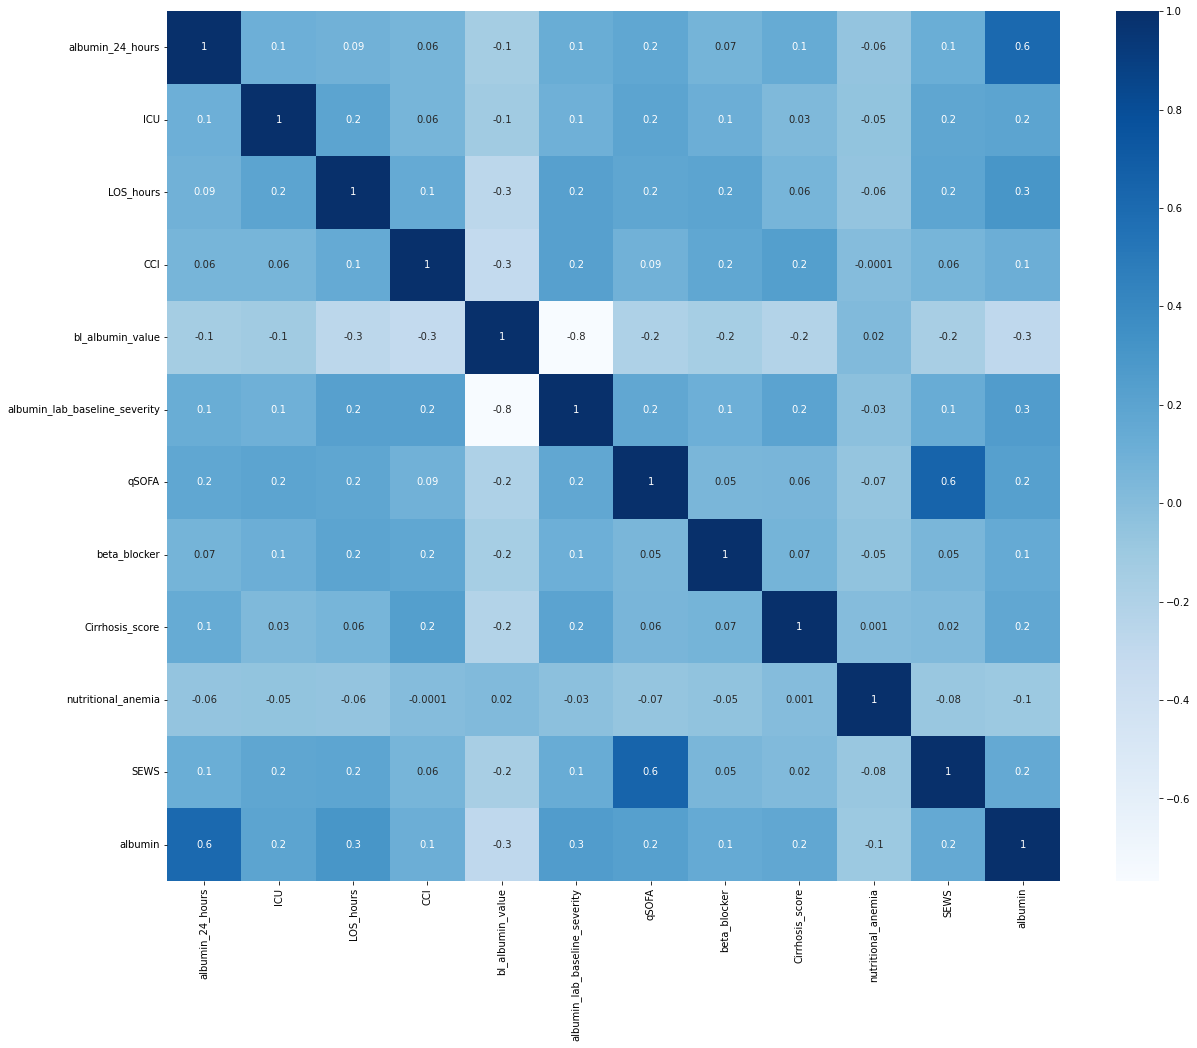

In [400]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [401]:
df.head()

albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
2                 1    1  184.466667    2               4.0   
3                 0    0  307.633333    6               1.6   
5                 0    0  394.050000    1               1.6   
6                 1    1  550.325000    1               2.6   
7                 0    0  999.516667    4               2.2   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
2                            0.0      1             0                0   
3                            1.0      0             1                0   
5                            1.0      0             0                0   
6                            1.0      0             1                0   
7                            1.0      0             0                0   

   nutritional_anemia  SEWS  albumin  
2                   0     3        1  
3                   0     0        1  
5                   0     0        1  
6                   0     1        1  
7                   0     0        1

In [402]:
ivs = df[1:].columns.tolist()
print(ivs)

['albumin_24_hours', 'ICU', 'LOS_hours', 'CCI', 'bl_albumin_value', 'albumin_lab_baseline_severity', 'qSOFA', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'SEWS', 'albumin']


In [403]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [404]:
sig_df

Var      Corr  p-value
0                albumin_24_hours  0.092638      0.0
1                             ICU  0.197890      0.0
2                       LOS_hours  1.000000      0.0
3                             CCI  0.147036      0.0
4                bl_albumin_value -0.269739      0.0
5   albumin_lab_baseline_severity  0.225555      0.0
6                           qSOFA  0.181134      0.0
7                    beta_blocker  0.193425      0.0
8                 Cirrhosis_score  0.063770      0.0
9              nutritional_anemia -0.061791      0.0
10                           SEWS  0.186860      0.0
11                        albumin  0.305687      0.0

In [405]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr  p-value
0                albumin_24_hours  0.092638      0.0
1                             ICU  0.197890      0.0
2                       LOS_hours  1.000000      0.0
3                             CCI  0.147036      0.0
4                bl_albumin_value -0.269739      0.0
5   albumin_lab_baseline_severity  0.225555      0.0
6                           qSOFA  0.181134      0.0
7                    beta_blocker  0.193425      0.0
8                 Cirrhosis_score  0.063770      0.0
9              nutritional_anemia -0.061791      0.0
10                           SEWS  0.186860      0.0
11                        albumin  0.305687      0.0

In [406]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Empty DataFrame
Columns: [Var, Corr, p-value]
Index: []

## Hospital Free Days

In [407]:
# drop other dvs: LOS_hours

df = f_df.drop(columns=['personid', 'encounterid', 'condition', 'LOS_hours'])

In [408]:
df.head()

albumin_24_hours  ICU  CCI  bl_albumin_value  \
2                 1    1    2               4.0   
3                 0    0    6               1.6   
5                 0    0    1               1.6   
6                 1    1    1               2.6   
7                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
5                            1.0      0                74.0             0   
6                            1.0      0                67.0             1   
7                            1.0      0                25.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
2                0                   0     3        1  
3                0                   0     0        1  
5                0                   0     0        1  
6                0                   0     1        1  
7                0                   0     0        1

In [409]:
df.hospital_free_days.describe()

count    3.413032e+06
mean     4.347727e+01
std      3.427168e+01
min      0.000000e+00
25%      9.000000e+00
50%      3.800000e+01
75%      8.300000e+01
max      9.000000e+01
Name: hospital_free_days, dtype: float64

## Correlations

In [410]:
# look at variable correlations with hospital free days
corr_mat = df.corr()['hospital_free_days']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

CCI                             -0.193746
albumin                         -0.064315
Cirrhosis_score                 -0.063567
albumin_lab_baseline_severity   -0.045156
nutritional_anemia              -0.042283
qSOFA                           -0.035845
albumin_24_hours                -0.027346
SEWS                            -0.024823
ICU                             -0.015412
beta_blocker                     0.033656
bl_albumin_value                 0.068058
hospital_free_days               1.000000
Name: hospital_free_days, dtype: float64


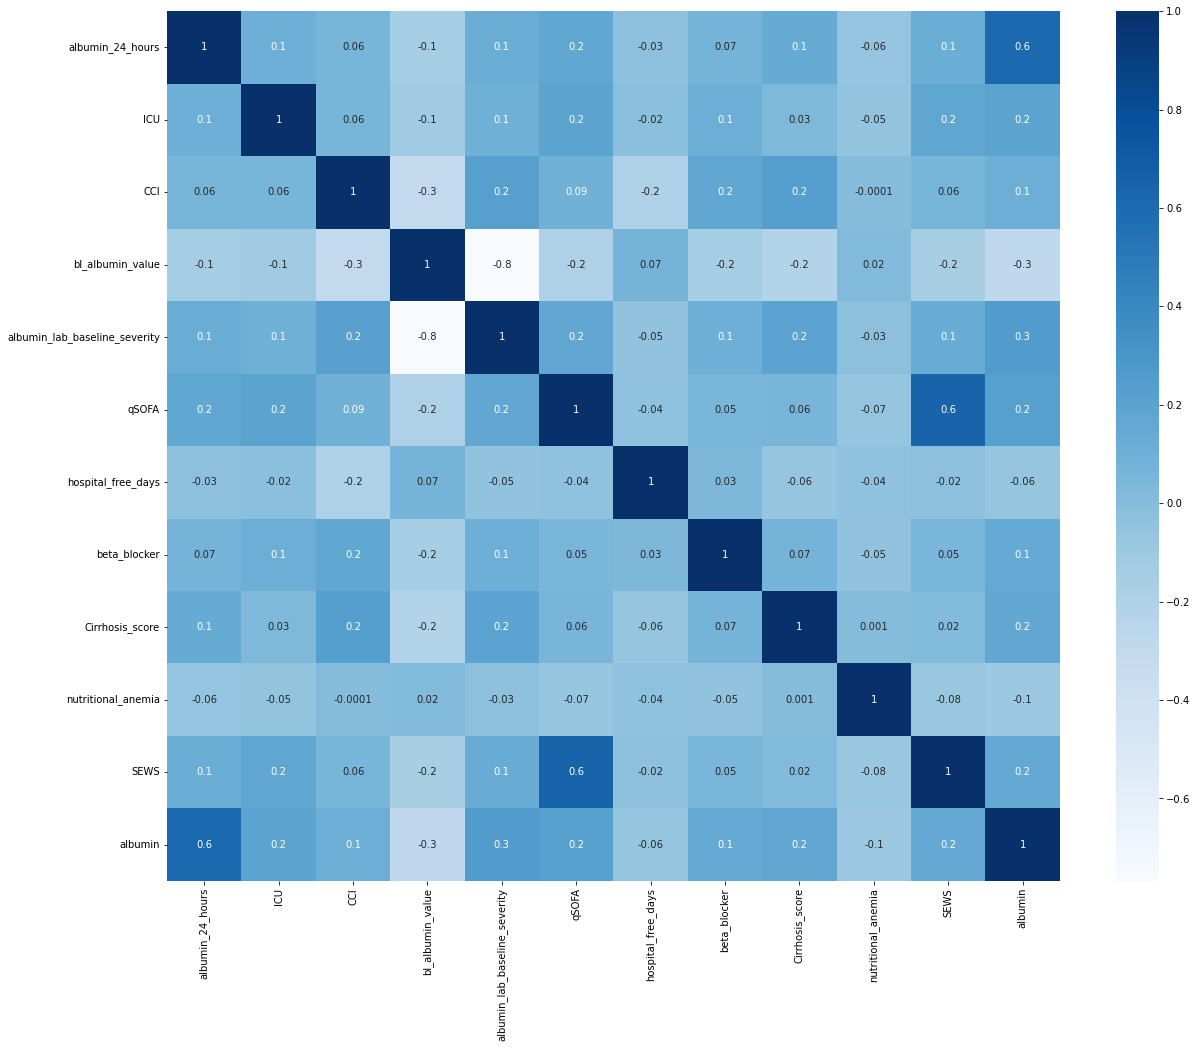

In [411]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [412]:
df.head()

albumin_24_hours  ICU  CCI  bl_albumin_value  \
2                 1    1    2               4.0   
3                 0    0    6               1.6   
5                 0    0    1               1.6   
6                 1    1    1               2.6   
7                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
2                            0.0      1                25.0             0   
3                            1.0      0                77.0             1   
5                            1.0      0                74.0             0   
6                            1.0      0                67.0             1   
7                            1.0      0                25.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
2                0                   0     3        1  
3                0                   0     0        1  
5                0                   0     0        1  
6                0                   0     1        1  
7                0                   0     0        1

In [413]:
ivs = df.columns.tolist()
print(ivs)

['albumin_24_hours', 'ICU', 'CCI', 'bl_albumin_value', 'albumin_lab_baseline_severity', 'qSOFA', 'hospital_free_days', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'SEWS', 'albumin']


In [414]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['hospital_free_days'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [415]:
sig_df

Var      Corr        p-value
0                albumin_24_hours -0.027346   0.000000e+00
1                             ICU -0.015412  2.463112e-178
2                             CCI -0.193746   0.000000e+00
3                bl_albumin_value  0.068058   0.000000e+00
4   albumin_lab_baseline_severity -0.045156   0.000000e+00
5                           qSOFA -0.035845   0.000000e+00
6              hospital_free_days  1.000000   0.000000e+00
7                    beta_blocker  0.033656   0.000000e+00
8                 Cirrhosis_score -0.063567   0.000000e+00
9              nutritional_anemia -0.042283   0.000000e+00
10                           SEWS -0.024823   0.000000e+00
11                        albumin -0.064315   0.000000e+00

In [416]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                albumin_24_hours -0.027346   0.000000e+00
1                             ICU -0.015412  2.463112e-178
2                             CCI -0.193746   0.000000e+00
3                bl_albumin_value  0.068058   0.000000e+00
4   albumin_lab_baseline_severity -0.045156   0.000000e+00
5                           qSOFA -0.035845   0.000000e+00
6              hospital_free_days  1.000000   0.000000e+00
7                    beta_blocker  0.033656   0.000000e+00
8                 Cirrhosis_score -0.063567   0.000000e+00
9              nutritional_anemia -0.042283   0.000000e+00
10                           SEWS -0.024823   0.000000e+00
11                        albumin -0.064315   0.000000e+00

In [417]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Empty DataFrame
Columns: [Var, Corr, p-value]
Index: []

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [418]:
df_iv = f_df.drop(columns= ['personid', 'encounterid', 'condition', 'LOS_hours', 'hospital_free_days'])

In [419]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                          feature       VIF
0                albumin_24_hours  1.648784
1                             ICU  1.162871
2                             CCI  2.270371
3                bl_albumin_value  2.282824
4   albumin_lab_baseline_severity  1.467362
5                           qSOFA  2.227676
6                    beta_blocker  1.307977
7                 Cirrhosis_score  1.229779
8              nutritional_anemia  1.326250
9                            SEWS  2.246884
10                        albumin  1.900730


In [420]:
# 16 independent features
#f_df = f_df[['ICU', 'mass_transfusion', 'total_transfusions', \
#             'anemia_status', 'CCI', 'bl_albumin_value', \
#             'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', \
#             'unknown_albumin_type', 'qSOFA', 'Cirrhosis', \
#             'beta_blocker', 'hemorrhagic', 'LOS_hours', '30_day_mortality', \
#             '30_day_readmission', 'SAPS']]

In [421]:
print(f_df.columns.to_list())

['personid', 'encounterid', 'condition', 'albumin_24_hours', 'ICU', 'LOS_hours', 'CCI', 'bl_albumin_value', 'albumin_lab_baseline_severity', 'qSOFA', 'hospital_free_days', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'SEWS', 'albumin']


In [422]:
f_df.albumin_24_hours.value_counts()

0    3324059
1      88973
Name: albumin_24_hours, dtype: int64

In [423]:
f_df.shape

(3413032, 16)

## Export as csv for other analysis - PSM

In [424]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_3M.csv', index=False)

## Export Small Sample for PSM testing

In [309]:
# all albumin 24 hour cases

a24_df = f_df[f_df['albumin_24_hours'] == 1]

In [310]:
a24_df.shape

(88973, 16)

In [311]:
# all other cases 

o_df = f_df[f_df['albumin_24_hours'] == 0]

In [312]:
o_df.shape

(3324059, 16)

In [313]:
# take random sample of other cases 

so_df = o_df.sample(n=500000)

In [316]:
f_df = pd.concat([a24_df, so_df])

In [317]:
f_df.shape

(588973, 16)

In [262]:
s_df = f_df.sample(n=100000)

In [263]:
s_df.shape

(100000, 14)

In [264]:
s_df.albumin.value_counts()

0    93937
1     6063
Name: albumin, dtype: int64

In [265]:
s_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_for_psm_small.csv', index=False)

## Convert Numeric Outcome Variables to Categorical

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [238]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

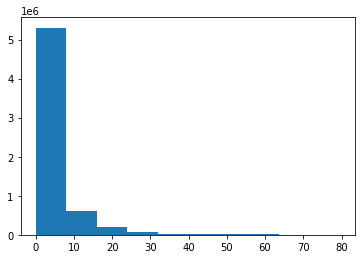

In [239]:
plt.hist(f_df['LOS_days']);

In [240]:
f_df['LOS_days'].describe()

count    6.239237e+06
mean     4.324605e+00
std      6.971444e+00
min      0.000000e+00
25%      5.729051e-01
50%      2.106944e+00
75%      4.996528e+00
max      7.963403e+01
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [241]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

0.636099537037037
3.567361111111111


In [242]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 0.636099537037037, 3.567361111111111, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [243]:
f_df['LOS_days'].value_counts()

0    2080170
2    2079660
1    2079407
Name: LOS_days, dtype: int64

In [244]:
f_df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours  ICU  CCI  qSOFA  hospital_free_days  \
0       D62                 1    0    4      0                87.0   
1       D64                 0    0    0      2                10.0   
2       D62                 1    1    2      1                25.0   
3       D64                 0    0    6      0                77.0   
4       D64                 1    0    8      0                22.0   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  albumin LOS_days  
0             1                0                   0     0        1        1  
1             0                0                   0     2        1        1  
2             0                0                   0     3        1        2  
3             1                0                   0     0        1        2  
4             1                0                   0     1        1        2

## Convert LOS_days to Categorical

In [245]:
# Calculate Tertiles

q1 = f_df['hospital_free_days'].quantile(q=(1/3))
q2 = f_df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

20.0
79.0


In [246]:
# bin the hospital_free_days var

LOS = f_df['hospital_free_days']
m = max(LOS)

bins = [0, 20, 79, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['hospital_free_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [247]:
f_df['hospital_free_days'].value_counts()

1    2122193
0    2085960
2    2031084
Name: hospital_free_days, dtype: int64

In [248]:
f_df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours  ICU  CCI  qSOFA hospital_free_days  \
0       D62                 1    0    4      0                  2   
1       D64                 0    0    0      2                  0   
2       D62                 1    1    2      1                  1   
3       D64                 0    0    6      0                  1   
4       D64                 1    0    8      0                  1   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  albumin LOS_days  
0             1                0                   0     0        1        1  
1             0                0                   0     2        1        1  
2             0                0                   0     3        1        2  
3             1                0                   0     0        1        2  
4             1                0                   0     1        1        2

In [249]:
f_df.shape

(6239237, 14)

In [254]:
f_df.albumin.value_counts()

0    5857549
1     381688
Name: albumin, dtype: int64

In [259]:
na = f_df.albumin.value_counts()[0]
a = f_df.albumin.value_counts()[1]

print('Pct received albumin:', round(((a/na)*100), 2))

Pct received albumin: 6.52


In [252]:
f_df.albumin_24_hours.value_counts()

0    6065264
1     173973
Name: albumin_24_hours, dtype: int64

In [260]:
na = f_df.albumin_24_hours.value_counts()[0]
a = f_df.albumin_24_hours.value_counts()[1]

print('Pct received albumin:', round(((a/na)*100), 2))

Pct received albumin: 2.87
